In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

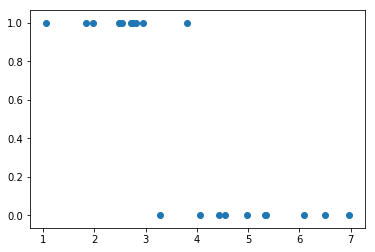

In [13]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

In [14]:
learning_rate = 0.001
training_epochs = 10000

X = tf.placeholder("float")
Y = tf.placeholder("float")

In [15]:
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                 tf.multiply(w[0], tf.pow(X, 0)))

In [16]:
w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [17]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    
    if epoch % 100 == 0:
        print(epoch, current_cost)

0 8.130497
100 3.6086535
200 2.229353
300 1.7943183
400 1.6571069
500 1.6138297
600 1.6001803
700 1.595875
800 1.5945174
900 1.594089
1000 1.593954
1100 1.5939114
1200 1.5938978
1300 1.5938938
1400 1.5938925
1500 1.5938919
1600 1.5938916
1700 1.5938916
1800 1.5938917
1900 1.5938917
2000 1.5938917
2100 1.5938916
2200 1.5938916
2300 1.5938916
2400 1.5938916
2500 1.5938916
2600 1.5938916
2700 1.5938916
2800 1.5938916
2900 1.5938916
3000 1.5938916
3100 1.5938916
3200 1.5938916
3300 1.5938916
3400 1.5938916
3500 1.5938916
3600 1.5938916
3700 1.5938916
3800 1.5938916
3900 1.5938916
4000 1.5938916
4100 1.5938916
4200 1.5938916
4300 1.5938916
4400 1.5938916
4500 1.5938916
4600 1.5938916
4700 1.5938916
4800 1.5938916
4900 1.5938916
5000 1.5938916
5100 1.5938916
5200 1.5938916
5300 1.5938916
5400 1.5938916
5500 1.5938916
5600 1.5938916
5700 1.5938916
5800 1.5938916
5900 1.5938916
6000 1.5938916
6100 1.5938916
6200 1.5938916
6300 1.5938916
6400 1.5938916
6500 1.5938916
6600 1.5938916
6700 1.59389

learned parameters [ 1.478648   -0.25587505]
accuracy 0.95


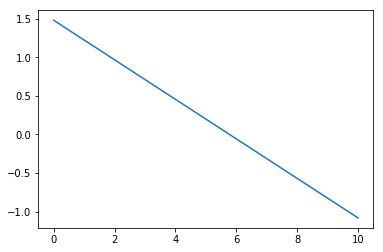

In [18]:
w_val = sess.run(w)
print('learned parameters', w_val)

correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
   
print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

sess.close()

all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.show()